In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



%matplotlib inline

In [3]:
df = pd.read_csv('googleplaystore.csv')

df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [8]:
Mseries = df['Size'].str.endswith('M')
Kseries = df['Size'].str.endswith('k')
Vseries = df['Size'].str.endswith('device')
Cseries = df['Size'].str.endswith('+')


df.loc[Mseries, 'Size'] = df.loc[Mseries, 'Size'].apply(lambda x: float(x.rstrip('M'))*1000)
df.loc[Kseries, 'Size'] = df.loc[Kseries, 'Size'].apply(lambda x: x.rstrip('k'))
df.loc[Vseries, 'Size'] = df.loc[Vseries, 'Size'].apply(lambda x: np.nan)
df.loc[Cseries, 'Size'] = df.loc[Cseries, 'Size'].apply(lambda x: np.nan)

df['Size'] = pd.to_numeric(df['Size'])

df['Size'].fillna(df['Size'].median(),inplace=True)

df['Reviews'] = pd.to_numeric(df['Reviews'])




In [9]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


In [12]:
#Easy way to clean characters from columns

def remove_char(val):
    return(float(val.replace(',','').replace('+','').replace('$','')))

df['Installs'] = df['Installs'].map(remove_char)

In [13]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9360, dtype: float64

In [14]:
df['Price']= df['Price'].map(remove_char)

In [15]:
df['Price'].unique()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [17]:
#Drops rows where rating is below 1 or above 5
df.drop(df[(df['Rating']<1)|(df['Rating']>5)].index, inplace=True)

#Drops rows where there were more reviews than installs
df.drop(df[df['Installs']<df['Reviews']].index,inplace = True)

#Drops any rows where a free app is being charged a price
df.drop(df[(df['Type'] == 'Free') & (df['Price'] > 0.0)].index, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9353 non-null   object 
 1   Category        9353 non-null   object 
 2   Rating          9353 non-null   float64
 3   Reviews         9353 non-null   int64  
 4   Size            9353 non-null   float64
 5   Installs        9353 non-null   float64
 6   Type            9353 non-null   object 
 7   Price           9353 non-null   float64
 8   Content Rating  9353 non-null   object 
 9   Genres          9353 non-null   object 
 10  Last Updated    9353 non-null   object 
 11  Current Ver     9353 non-null   object 
 12  Android Ver     9353 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.0+ KB


<AxesSubplot:xlabel='Price'>

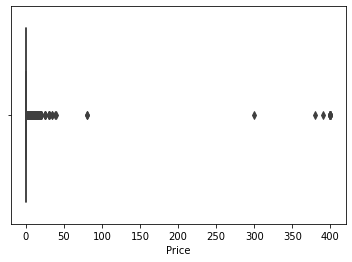

In [24]:
#Univariate Analysis
sns.boxplot(x=df['Price'] ,data=df)
#The data definitely shows outliers

<AxesSubplot:xlabel='Reviews'>

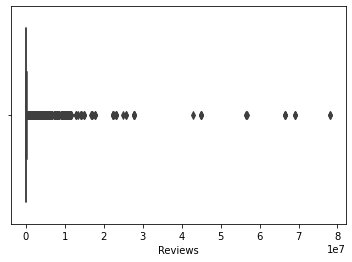

In [31]:
#Univariate Analysis
sns.boxplot(x=df['Reviews'] ,data=df)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

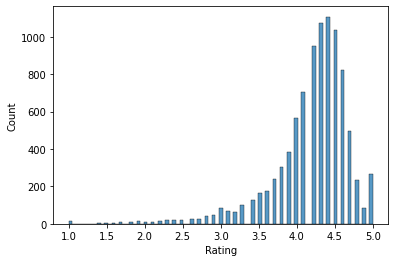

In [25]:
#Univariate Analysis
sns.histplot(x=df['Rating'] ,data=df)
#Distributed towards the higher ratings

<AxesSubplot:xlabel='Size', ylabel='Count'>

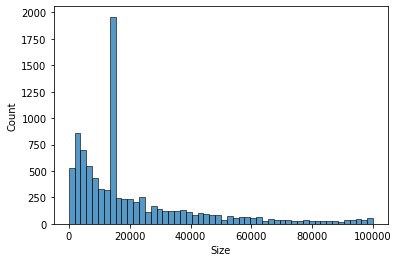

In [26]:
#Univariate Analysis
sns.histplot(x=df['Size'] ,data=df)
#typicaly smaller sized apps 

In [28]:
#Drops rows where the price is greater than $100
df.drop(df[df['Price']>100].index,inplace = True)

In [33]:
#Drops rows where the number of reviews is more than 2 million
df.drop(df[df['Reviews']>2000000].index,inplace = True)

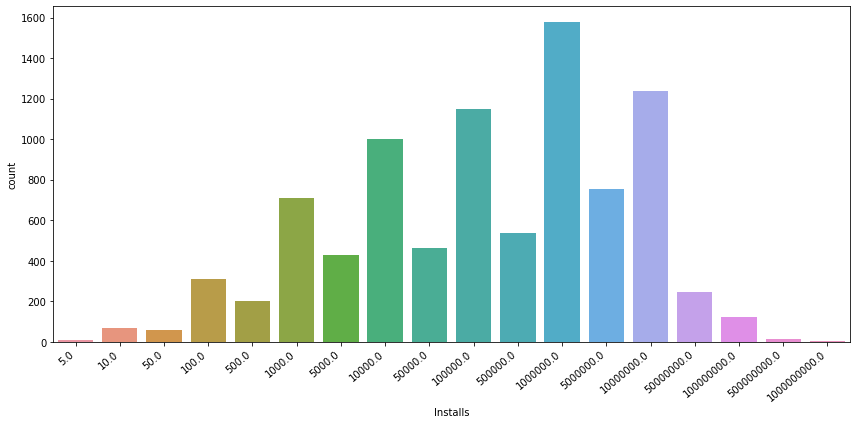

In [44]:
plt.figure(figsize=(12,6)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(data=df,x=df['Installs'])


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [48]:
df['Installs'].median()

500000.0

In [46]:
df['Installs'].quantile(.75)

5000000.0

In [49]:
#Drops rows above the 75th percentile of Installs
df.drop(df[df['Installs']>5000000.0].index,inplace = True)

In [51]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [53]:
df.shape

(7258, 13)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

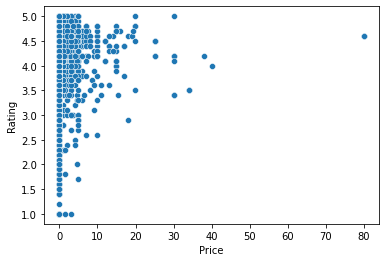

In [133]:
#Scatter Plot for Rating & Price
sns.scatterplot(data = df, y=df['Rating'],x=df['Price'])



<AxesSubplot:xlabel='Size', ylabel='Rating'>

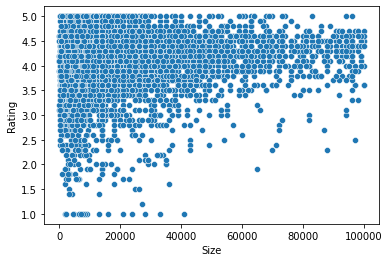

In [134]:
#Scatter Plot for Rating & Size
sns.scatterplot(data = df, y=df['Rating'],x=df['Size'])




<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

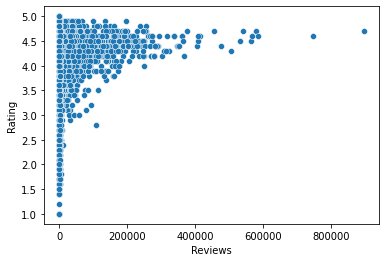

In [135]:
#Scatter Plot for Rating & Review
sns.scatterplot(data = df, y=df['Rating'],x=df['Reviews'])




<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

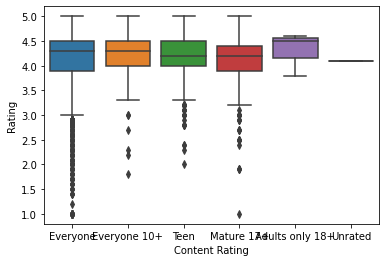

In [136]:
#Boxplot for Rating & Content Rating
sns.boxplot(data = df, y=df['Rating'],x=df['Content Rating'])



<AxesSubplot:xlabel='Rating', ylabel='Category'>

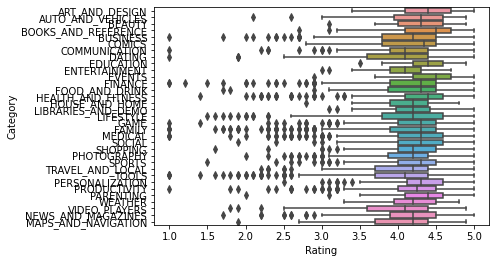

In [137]:
#Boxplot for Rating & Category
sns.boxplot(data = df, x=df['Rating'],y=df['Category'])




<AxesSubplot:xlabel='Reviews', ylabel='Category'>

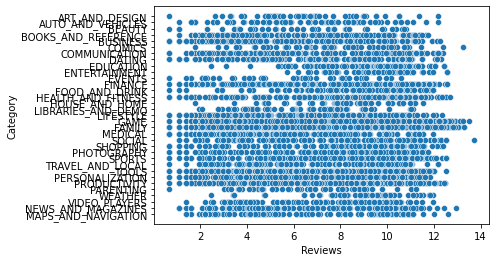

In [138]:
sns.scatterplot(x=log_reviews, y=df['Category'], data=df)

In [71]:
df['Category'].nunique()

33

In [98]:
inp1 = df.copy(deep=True)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [99]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [100]:
inp1['Reviews'] = inp1['Reviews'].apply(lambda x: np.log(1 + x))
inp1['Installs'] = inp1['Installs'].apply(lambda x: np.log(1 +x))
inp1['Size'] = inp1['Size'].apply(lambda x: np.log(1 +x))



In [101]:
inp1 = inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1)

In [102]:
inp2 = pd.get_dummies(inp1, columns=['Category','Type','Content Rating','Genres'])
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,9.852247,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,9.071193,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,7.937732,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,8.630700,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
inp2.shape 

(7258, 156)

In [105]:
df_train, df_test = train_test_split(inp2, test_size=0.3)


(5080, 156)

In [110]:
y_train = df_train['Rating']
X_train = df_train.loc[:, df_train.columns != 'Rating']

y_test = df_test['Rating']
X_test = df_test.loc[:, df_test.columns != 'Rating']

In [112]:
reg = LinearRegression().fit(X_train, y_train)



LinearRegression()

In [124]:
y_predicted = reg.predict(X_test)

In [125]:
rms = mean_squared_error(y_test, y_predicted, squared=False)
rms

0.5270920110126175